<a href="https://colab.research.google.com/github/henry-del/assignment2/blob/master/cnn%2Bbert%2Blogisticregression(%E8%A9%95%E5%83%B9%E8%88%87%E6%94%B9%E8%89%AF_%E5%8F%A3%E7%BD%A9)(AdaBoost%E8%88%87GradientBoost).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files 
uploaded = files.upload() 

Saving 評價與改良(口罩)-設計想法.xlsx to 評價與改良(口罩)-設計想法.xlsx


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel("評價與改良(口罩)-設計想法.xlsx")

In [ ]:
data

,你的故事,評分,Unnamed: 2
0,加入圖案的效果會很好，更是加入班服的特色！,0.0,NaN
1,防疫 洗手,0.0,NaN
2,勤洗手可以消滅病毒。,0.0,NaN
3,未作答,0.0,NaN
4,病毒從口罩入侵到人類的體內,0.0,NaN
...,...,...,...
160,"下面是不要生病,上面是要戴口罩才好",2.0,NaN
161,一個人帶著一個口罩在洗手,2.0,NaN
162,戴口罩，勤洗手，保持社交距離。,2.0,NaN
163,"這次我更注重保護這個方向,所以我加了盾牌.",2.0,NaN


In [ ]:
data=data.drop(['Unnamed: 2'], axis=1)

In [ ]:
data = data.rename(columns = {'評分':'score','你的故事':'story'})

In [ ]:
data['story']=data['story'].fillna('空白')
data['story']=data['story'].apply(str)

In [ ]:
data['score'].value_counts()

1.0    87
0.0    73
2.0     5
Name: score, dtype: int64

In [ ]:
data

,story,score
0,加入圖案的效果會很好，更是加入班服的特色！,0.0
1,防疫 洗手,0.0
2,勤洗手可以消滅病毒。,0.0
3,未作答,0.0
4,病毒從口罩入侵到人類的體內,0.0
...,...,...
160,"下面是不要生病,上面是要戴口罩才好",2.0
161,一個人帶著一個口罩在洗手,2.0
162,戴口罩，勤洗手，保持社交距離。,2.0
163,"這次我更注重保護這個方向,所以我加了盾牌.",2.0


In [ ]:
data['story'][20:30]

20    我們需要大家來守護自己和別人，愛自己也愛別人!
21                        好可愛
22                   來自於 我的靈感
23           因為因為我覺得看手機和電腦會近視
24    因為水是偏藍色的，所以我就畫了一個藍色的笑臉。
25               可愛的小兔子 蹦蹦跳跳的
26           我們要珍惜生命愛護自己在愛護別人
27                 祝老師教師節要快樂喔
28             打造很多徽章，賣給全世界的人
29                 我做了一個獅子好開心
Name: story, dtype: object

In [ ]:
!ls
%cd '/content/drive/MyDrive/訓練模型資料/圖片/視覺-評價與改良(口罩)'
!ls

 drive	      '評價與改良(口罩)-設計想法.xlsx'
 sample_data  '評價與改良(班服)-設計想法.xlsx'
/content/drive/.shortcut-targets-by-id/1wLNuAmxGfATtWP7aAHzrmYO2QnzLLi8g/訓練模型資料/圖片/視覺-評價與改良(口罩)
視覺-評價與改良-0分  視覺-評價與改良-1分  視覺-評價與改良-2分


In [ ]:
% tensorflow_version 2.x
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
data_image = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
train_dataset = data_image.flow_from_directory(
    '/content/drive/MyDrive/訓練模型資料/圖片/視覺-評價與改良(口罩)',
    target_size=(224,224),
    class_mode='sparse',
    subset='training',
    batch_size=165,
    shuffle=False
    )

Found 165 images belonging to 3 classes.


In [ ]:
x,y=next(train_dataset)

In [ ]:
data['graph']=''

In [ ]:
data

,story,score,graph
0,加入圖案的效果會很好，更是加入班服的特色！,0.0,
1,防疫 洗手,0.0,
2,勤洗手可以消滅病毒。,0.0,
3,未作答,0.0,
4,病毒從口罩入侵到人類的體內,0.0,
...,...,...,...
160,"下面是不要生病,上面是要戴口罩才好",2.0,
161,一個人帶著一個口罩在洗手,2.0,
162,戴口罩，勤洗手，保持社交距離。,2.0,
163,"這次我更注重保護這個方向,所以我加了盾牌.",2.0,


In [ ]:
data['graph']

0       
1       
2       
3       
4       
      ..
160     
161     
162     
163     
164     
Name: graph, Length: 165, dtype: object

In [ ]:
for i in range(165):
  data['graph'][i]=x[i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data

,story,score,graph
0,加入圖案的效果會很好，更是加入班服的特色！,0.0,"[[[0.62729573, 0.6326514, 0.72727174], [0.6288..."
1,防疫 洗手,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,勤洗手可以消滅病毒。,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,未作答,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,病毒從口罩入侵到人類的體內,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
...,...,...,...
160,"下面是不要生病,上面是要戴口罩才好",2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
161,一個人帶著一個口罩在洗手,2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
162,戴口罩，勤洗手，保持社交距離。,2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
163,"這次我更注重保護這個方向,所以我加了盾牌.",2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [ ]:
pip install transformers

     |████████████████████████████████| 4.0 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 47.0 MB/s 
     |████████████████████████████████| 77 kB 4.4 MB/s 
     |████████████████████████████████| 6.6 MB 40.4 MB/s 
     |████████████████████████████████| 895 kB 47.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer
PRETRAINED_MODEL_NAME = "bert-base-chinese"  # 指定繁簡中文 BERT-BASE 預訓練模型
# 取得此預訓練模型所使用的 tokenizer
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

Downloading:   0%|          | 0.00/107k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/624 [00:00<?, ?B/s]

In [ ]:
def convert_example_to_feature(review):
  max_length=80
  # combine step for tokenization, WordPiece vector mapping, adding special tokens as well as truncating reviews longer than the max length
  
  return tokenizer.encode_plus(review, 
                add_special_tokens = True, # add [CLS], [SEP]
                max_length = max_length, # max length of the text that can go to BERT
                pad_to_max_length = True, # add [PAD] tokens
                return_attention_mask = True, # add attention mask to not focus on pad tokens
              )

In [ ]:
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
  }, label

In [ ]:
def encode_examples(data):
  
  # prepare list, so that we can build up final TensorFlow dataset from slices.
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []    
  for story,score in zip(list(data['story']),list(data['score'])):
    
    bert_input = convert_example_to_feature(story)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([score])
  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)


In [ ]:
def Average(lst):
  return sum(lst) / len(lst)

In [ ]:
import numpy as np

In [ ]:
type(data.score[50])

numpy.float64

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
data

,story,score,graph
0,加入圖案的效果會很好，更是加入班服的特色！,0.0,"[[[0.62729573, 0.6326514, 0.72727174], [0.6288..."
1,防疫 洗手,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
2,勤洗手可以消滅病毒。,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
3,未作答,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
4,病毒從口罩入侵到人類的體內,0.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
...,...,...,...
160,"下面是不要生病,上面是要戴口罩才好",2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
161,一個人帶著一個口罩在洗手,2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
162,戴口罩，勤洗手，保持社交距離。,2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."
163,"這次我更注重保護這個方向,所以我加了盾牌.",2.0,"[[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,..."


In [ ]:
res = np.concatenate([arr[np.newaxis] for arr in data.graph])
res.shape

(165, 224, 224, 3)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
for i in range(2):
  for j in range(2):
    print(i+j) 
  print(123)   

0
1
123
1
2
123


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
x[0]

array([[[0.62729573, 0.6326514 , 0.72727174],
        [0.6288082 , 0.6342086 , 0.7284531 ],
        [0.6303207 , 0.6357659 , 0.72963446],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.67083365, 0.6737088 , 0.8078331 ],
        [0.669339  , 0.67215157, 0.80689335],
        [0.6678445 , 0.67059433, 0.8059537 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[0.3179589 , 0.3061942 , 0.5810158 ],
        [0.317941  , 0.3061763 , 0.58098006],
        [0.31792307, 0.30615836, 0.5809442 ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.29917544, 0.2950645 , 0.5562395 ],
        [0.29922915, 0.29510924, 0.55602473],
        [0.29928282, 0

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Downloading:   0%|          | 0.00/456M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 32s 1s/step - loss: 1.3612 - accuracy: 0.3659 - val_loss: 0.9056 - val_accuracy: 0.5244
Epoch 2/10
6/6 [==============================] - 4s 650ms/step - loss: 0.8900 - accuracy: 0.6829 - val_loss: 0.7074 - val_accuracy: 0.8293
Epoch 3/10
6/6 [==============================] - 4s 649ms/step - loss: 0.7321 - accuracy: 0.7927 - val_loss: 0.5754 - val_accuracy: 0.8659
Epoch 4/10
6/6 [==============================] - 4s 653ms/step - loss: 0.6015 - accuracy: 0.8049 - val_loss: 0.4032 - val_accuracy: 0.9512
Epoch 5/10
6/6 [==============================] - 4s 653ms/step - loss: 0.4269 - accuracy: 0.9024 - val_loss: 0.2940 - val_accuracy: 0.9634
Epoch 6/10
6/6 [==============================] - 4s 704ms/step - loss: 0.3347 - accuracy: 0.9390 - val_loss: 0.2031 - val_accuracy: 0.9756
Epoch 7/10
6/6 [==============================] - 4s 657ms/step - loss: 0.2217 - accuracy: 0.9756 - val_loss: 0.1279 - val_accuracy: 0.9878
Epoch 8/10
6/6 [======

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 27s 1s/step - loss: 1.3991 - accuracy: 0.1205 - val_loss: 0.8932 - val_accuracy: 0.6988
Epoch 2/10
6/6 [==============================] - 4s 669ms/step - loss: 0.9014 - accuracy: 0.6265 - val_loss: 0.7261 - val_accuracy: 0.8313
Epoch 3/10
6/6 [==============================] - 4s 668ms/step - loss: 0.7139 - accuracy: 0.8072 - val_loss: 0.5841 - val_accuracy: 0.9518
Epoch 4/10
6/6 [==============================] - 4s 669ms/step - loss: 0.6093 - accuracy: 0.8795 - val_loss: 0.4374 - val_accuracy: 0.9518
Epoch 5/10
6/6 [==============================] - 4s 669ms/step - loss: 0.4594 - accuracy: 0.9759 - val_loss: 0.3009 - val_accuracy: 0.9759
Epoch 6/10
6/6 [==============================] - 4s 670ms/step - loss: 0.3319 - accuracy: 0.9639 - val_loss: 0.2076 - val_accuracy: 0.9880
Epoch 7/10
6/6 [==============================] - 4s 671ms/step - loss: 0.2248 - accuracy: 0.9880 - val_loss: 0.1430 - val_accuracy: 0.9880
Epoch 8/10
6/6 [======

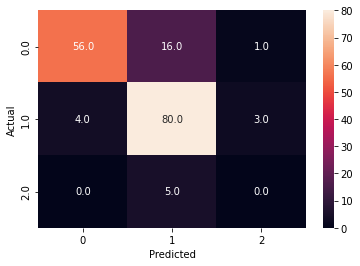

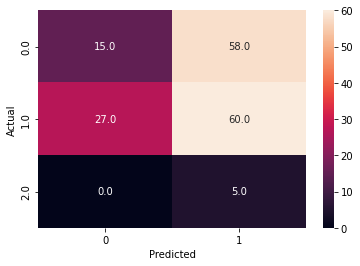

     bert  cnn  actual
0       0    1     0.0
1       1    1     0.0
2       1    1     0.0
3       0    1     0.0
4       1    0     0.0
..    ...  ...     ...
160     1    1     1.0
161     2    1     1.0
162     1    0     1.0
163     1    1     2.0
164     1    1     2.0

[165 rows x 3 columns]
LR: 0.842345 (0.013077)
[array([0.85542169, 0.82926829])]


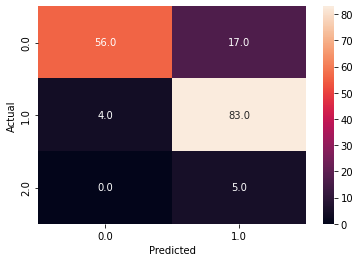

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 27s 1s/step - loss: 1.2110 - accuracy: 0.1829 - val_loss: 0.7411 - val_accuracy: 0.7805
Epoch 2/10
6/6 [==============================] - 4s 671ms/step - loss: 0.7305 - accuracy: 0.7805 - val_loss: 0.6107 - val_accuracy: 0.8659
Epoch 3/10
6/6 [==============================] - 4s 669ms/step - loss: 0.6060 - accuracy: 0.8293 - val_loss: 0.4732 - val_accuracy: 0.9390
Epoch 4/10
6/6 [==============================] - 4s 669ms/step - loss: 0.4753 - accuracy: 0.9146 - val_loss: 0.3514 - val_accuracy: 0.9512
Epoch 5/10
6/6 [==============================] - 4s 667ms/step - loss: 0.3626 - accuracy: 0.9512 - val_loss: 0.2435 - val_accuracy: 0.9878
Epoch 6/10
6/6 [==============================] - 4s 667ms/step - loss: 0.2597 - accuracy: 0.9634 - val_loss: 0.1632 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 4s 665ms/step - loss: 0.1765 - accuracy: 1.0000 - val_loss: 0.1098 - val_accuracy: 1.0000
Epoch 8/10
6/6 [======

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 27s 1s/step - loss: 1.1638 - accuracy: 0.4217 - val_loss: 0.9091 - val_accuracy: 0.5904
Epoch 2/10
6/6 [==============================] - 4s 674ms/step - loss: 0.9587 - accuracy: 0.3614 - val_loss: 0.8561 - val_accuracy: 0.8554
Epoch 3/10
6/6 [==============================] - 4s 675ms/step - loss: 0.8757 - accuracy: 0.6506 - val_loss: 0.7506 - val_accuracy: 0.8795
Epoch 4/10
6/6 [==============================] - 4s 677ms/step - loss: 0.7692 - accuracy: 0.8193 - val_loss: 0.6108 - val_accuracy: 0.9036
Epoch 5/10
6/6 [==============================] - 4s 677ms/step - loss: 0.6031 - accuracy: 0.9157 - val_loss: 0.4656 - val_accuracy: 0.9398
Epoch 6/10
6/6 [==============================] - 4s 681ms/step - loss: 0.4799 - accuracy: 0.9639 - val_loss: 0.3240 - val_accuracy: 0.9759
Epoch 7/10
6/6 [==============================] - 4s 682ms/step - loss: 0.3494 - accuracy: 0.9759 - val_loss: 0.2190 - val_accuracy: 0.9759
Epoch 8/10
6/6 [======

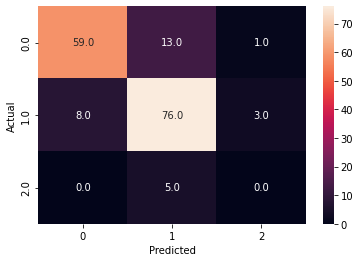

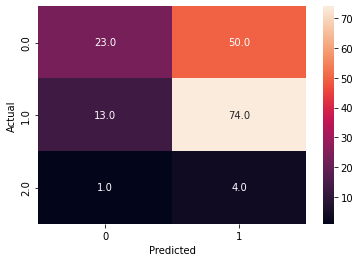

     bert  cnn  actual
0       0    1     0.0
1       1    1     0.0
2       1    0     0.0
3       0    1     0.0
4       0    1     0.0
..    ...  ...     ...
160     1    1     1.0
161     1    1     1.0
162     1    1     1.0
163     1    1     2.0
164     1    1     2.0

[165 rows x 3 columns]
LR: 0.836468 (0.017191)
[array([0.81927711, 0.85365854])]


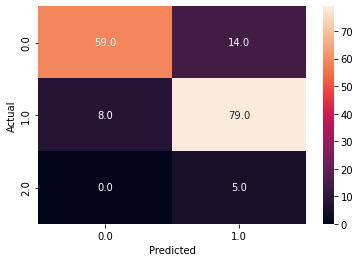

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 28s 1s/step - loss: 1.1431 - accuracy: 0.2927 - val_loss: 0.9598 - val_accuracy: 0.5610
Epoch 2/10
6/6 [==============================] - 4s 667ms/step - loss: 0.9510 - accuracy: 0.5366 - val_loss: 0.9145 - val_accuracy: 0.5610
Epoch 3/10
6/6 [==============================] - 4s 665ms/step - loss: 0.9584 - accuracy: 0.5610 - val_loss: 0.8537 - val_accuracy: 0.5976
Epoch 4/10
6/6 [==============================] - 4s 666ms/step - loss: 0.8689 - accuracy: 0.5854 - val_loss: 0.7066 - val_accuracy: 0.7805
Epoch 5/10
6/6 [==============================] - 4s 663ms/step - loss: 0.6833 - accuracy: 0.8171 - val_loss: 0.6373 - val_accuracy: 0.8659
Epoch 6/10
6/6 [==============================] - 4s 669ms/step - loss: 0.6304 - accuracy: 0.8293 - val_loss: 0.5313 - val_accuracy: 0.9146
Epoch 7/10
6/6 [==============================] - 4s 667ms/step - loss: 0.5326 - accuracy: 0.9146 - val_loss: 0.4161 - val_accuracy: 0.9390
Epoch 8/10
6/6 [======

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 27s 1s/step - loss: 1.1214 - accuracy: 0.4096 - val_loss: 1.0379 - val_accuracy: 0.4940
Epoch 2/10
6/6 [==============================] - 4s 673ms/step - loss: 0.9934 - accuracy: 0.5301 - val_loss: 0.8834 - val_accuracy: 0.5422
Epoch 3/10
6/6 [==============================] - 4s 672ms/step - loss: 0.9156 - accuracy: 0.4940 - val_loss: 0.8622 - val_accuracy: 0.5783
Epoch 4/10
6/6 [==============================] - 4s 674ms/step - loss: 0.9134 - accuracy: 0.6024 - val_loss: 0.8179 - val_accuracy: 0.5542
Epoch 5/10
6/6 [==============================] - 4s 674ms/step - loss: 0.8368 - accuracy: 0.5904 - val_loss: 0.7581 - val_accuracy: 0.5663
Epoch 6/10
6/6 [==============================] - 4s 678ms/step - loss: 0.7418 - accuracy: 0.6386 - val_loss: 0.6561 - val_accuracy: 0.8313
Epoch 7/10
6/6 [==============================] - 4s 679ms/step - loss: 0.6600 - accuracy: 0.7590 - val_loss: 0.5255 - val_accuracy: 0.9277
Epoch 8/10
6/6 [======

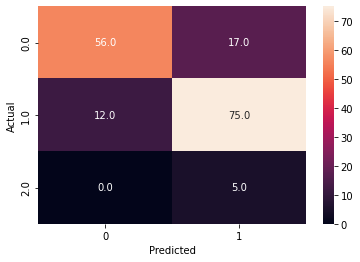

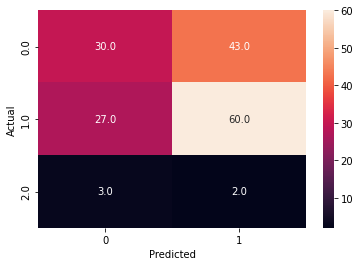

     bert  cnn  actual
0       0    1     0.0
1       1    1     0.0
2       1    1     0.0
3       1    1     0.0
4       1    1     0.0
..    ...  ...     ...
160     1    1     1.0
161     0    1     1.0
162     1    0     1.0
163     1    1     2.0
164     1    1     2.0

[165 rows x 3 columns]
LR: 0.793932 (0.001249)
[array([0.79518072, 0.79268293])]


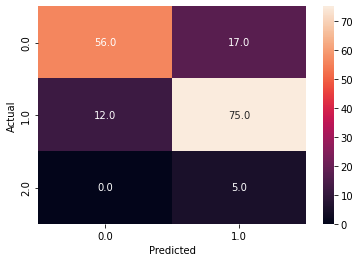

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 27s 1s/step - loss: 1.1918 - accuracy: 0.2683 - val_loss: 0.8523 - val_accuracy: 0.5488
Epoch 2/10
6/6 [==============================] - 4s 673ms/step - loss: 0.8432 - accuracy: 0.5854 - val_loss: 0.7325 - val_accuracy: 0.6463
Epoch 3/10
6/6 [==============================] - 4s 664ms/step - loss: 0.7431 - accuracy: 0.7073 - val_loss: 0.5631 - val_accuracy: 0.9268
Epoch 4/10
6/6 [==============================] - 4s 666ms/step - loss: 0.6061 - accuracy: 0.9390 - val_loss: 0.4411 - val_accuracy: 0.9634
Epoch 5/10
6/6 [==============================] - 4s 666ms/step - loss: 0.4395 - accuracy: 0.9756 - val_loss: 0.3116 - val_accuracy: 0.9756
Epoch 6/10
6/6 [==============================] - 4s 669ms/step - loss: 0.3276 - accuracy: 0.9634 - val_loss: 0.2021 - val_accuracy: 0.9756
Epoch 7/10
6/6 [==============================] - 4s 669ms/step - loss: 0.2103 - accuracy: 0.9756 - val_loss: 0.1279 - val_accuracy: 0.9878
Epoch 8/10
6/6 [======

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 28s 1s/step - loss: 1.2408 - accuracy: 0.4096 - val_loss: 0.9655 - val_accuracy: 0.4458
Epoch 2/10
6/6 [==============================] - 4s 672ms/step - loss: 0.9272 - accuracy: 0.4819 - val_loss: 0.8777 - val_accuracy: 0.4458
Epoch 3/10
6/6 [==============================] - 4s 672ms/step - loss: 0.8554 - accuracy: 0.6024 - val_loss: 0.7950 - val_accuracy: 0.8916
Epoch 4/10
6/6 [==============================] - 4s 674ms/step - loss: 0.7923 - accuracy: 0.7470 - val_loss: 0.6763 - val_accuracy: 0.9277
Epoch 5/10
6/6 [==============================] - 4s 675ms/step - loss: 0.6538 - accuracy: 0.8434 - val_loss: 0.5240 - val_accuracy: 0.9398
Epoch 6/10
6/6 [==============================] - 4s 676ms/step - loss: 0.5434 - accuracy: 0.9036 - val_loss: 0.3661 - val_accuracy: 0.9880
Epoch 7/10
6/6 [==============================] - 4s 673ms/step - loss: 0.3709 - accuracy: 0.9759 - val_loss: 0.2669 - val_accuracy: 0.9880
Epoch 8/10
6/6 [======

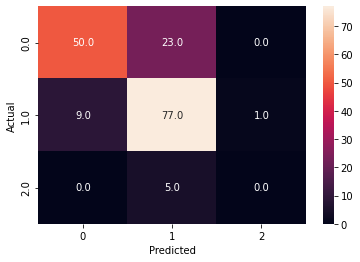

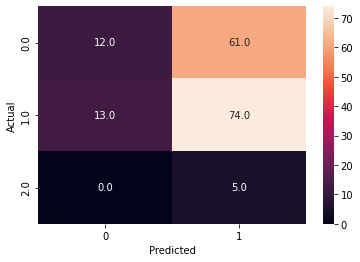

     bert  cnn  actual
0       1    1     0.0
1       1    1     0.0
2       0    1     0.0
3       1    1     0.0
4       1    1     0.0
..    ...  ...     ...
160     1    1     1.0
161     1    1     1.0
162     1    1     1.0
163     1    1     2.0
164     1    1     2.0

[165 rows x 3 columns]
LR: 0.775566 (0.031663)
[array([0.80722892, 0.74390244])]


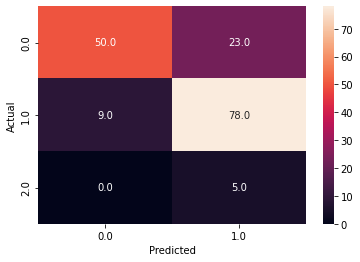

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 27s 1s/step - loss: 1.2721 - accuracy: 0.2683 - val_loss: 0.9282 - val_accuracy: 0.4512
Epoch 2/10
6/6 [==============================] - 4s 663ms/step - loss: 0.8601 - accuracy: 0.6098 - val_loss: 0.6914 - val_accuracy: 0.9024
Epoch 3/10
6/6 [==============================] - 4s 665ms/step - loss: 0.6896 - accuracy: 0.9146 - val_loss: 0.5594 - val_accuracy: 0.9512
Epoch 4/10
6/6 [==============================] - 4s 666ms/step - loss: 0.5808 - accuracy: 0.8902 - val_loss: 0.4282 - val_accuracy: 0.9756
Epoch 5/10
6/6 [==============================] - 4s 668ms/step - loss: 0.4776 - accuracy: 0.9756 - val_loss: 0.3251 - val_accuracy: 0.9878
Epoch 6/10
6/6 [==============================] - 4s 665ms/step - loss: 0.3477 - accuracy: 0.9756 - val_loss: 0.2387 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 4s 665ms/step - loss: 0.2476 - accuracy: 0.9878 - val_loss: 0.1566 - val_accuracy: 1.0000
Epoch 8/10
6/6 [======

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-chinese and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
6/6 [==============================] - 28s 1s/step - loss: 1.1575 - accuracy: 0.2892 - val_loss: 0.8942 - val_accuracy: 0.6265
Epoch 2/10
6/6 [==============================] - 4s 676ms/step - loss: 0.9338 - accuracy: 0.5904 - val_loss: 0.7428 - val_accuracy: 0.8434
Epoch 3/10
6/6 [==============================] - 4s 675ms/step - loss: 0.7154 - accuracy: 0.8434 - val_loss: 0.6108 - val_accuracy: 0.8554
Epoch 4/10
6/6 [==============================] - 4s 675ms/step - loss: 0.6215 - accuracy: 0.8072 - val_loss: 0.4873 - val_accuracy: 0.9036
Epoch 5/10
6/6 [==============================] - 4s 676ms/step - loss: 0.5181 - accuracy: 0.8916 - val_loss: 0.3720 - val_accuracy: 0.9398
Epoch 6/10
6/6 [==============================] - 4s 678ms/step - loss: 0.4159 - accuracy: 0.9157 - val_loss: 0.2747 - val_accuracy: 0.9398
Epoch 7/10
6/6 [==============================] - 4s 679ms/step - loss: 0.2980 - accuracy: 0.9398 - val_loss: 0.2002 - val_accuracy: 0.9639
Epoch 8/10
6/6 [======

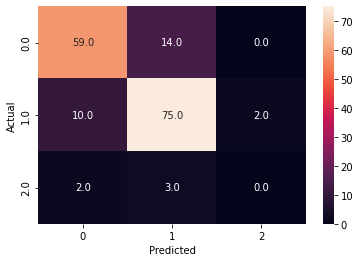

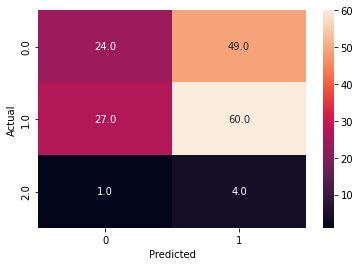

     bert  cnn  actual
0       1    1     0.0
1       1    1     0.0
2       1    1     0.0
3       1    1     0.0
4       0    1     0.0
..    ...  ...     ...
160     1    0     1.0
161     0    0     1.0
162     0    1     1.0
163     1    0     2.0
164     0    1     2.0

[165 rows x 3 columns]
LR: 0.824346 (0.017117)
[array([0.80722892, 0.84146341])]


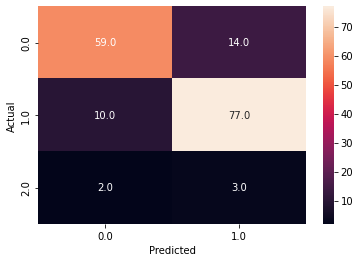

results [0.8192771077156067, 0.8292682766914368, 0.8433734774589539, 0.792682945728302, 0.7710843086242676, 0.8170731663703918, 0.7108433842658997, 0.8292682766914368, 0.8072289228439331, 0.8170731663703918]
Mean-Bert-Accuracy: 0.8037173032760621
acc_per_fold [0.46987950801849365, 0.4390243887901306, 0.6024096608161926, 0.5731707215309143, 0.5542168617248535, 0.5365853905677795, 0.5180723071098328, 0.5243902206420898, 0.5180723071098328, 0.5]
Mean-Cnn-Accuracy 0.5235821366310119
total accuracy 0.8145312959153687


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold,cross_val_predict 
from sklearn import model_selection
from transformers import TFBertForSequenceClassification,BertTokenizer
import tensorflow as tf
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
fold_no=1
##bert
learning_rate =3e-5
number_of_epochs =10
metric_accuracy=[]
metric_loss=[]
predict_bert=[]
actual_bert=[]
mean_bert_accuracy=[]
##cnn
acc_per_fold=[]
loss_per_fold=[]
mean_cnn_accuracy=[]
predict_cnn=[]
actual_cnn=[]
#logisticregression
result=[]
predict_list_1=[]
actual_list_1=[]
predict_list_2=[]
actual_list_2=[]
logistic_acc=[]

target=data['score']
kf = StratifiedKFold(n_splits=2, shuffle=True)
kf.get_n_splits(data)
for i in range(5):
 for train_index, test_index in kf.split(data,target):
  X_train_word, X_test_word = data.story[train_index], data.story[test_index]
  y_train, y_test = data.score[train_index], data.score[test_index]  
  X_train,y_train = X_train_word.to_frame(),y_train.to_frame() 
  X_test,y_test = X_test_word.to_frame(),y_test.to_frame()   
  train= pd.DataFrame(X_train,columns=['story'])
  train= pd.concat([train,pd.DataFrame(y_train,columns=['score'])],axis=1)
  test= pd.DataFrame(X_test,columns=['story'])
  test= pd.concat([test,pd.DataFrame(y_test,columns=['score'])], axis=1)
  batch_size=16
  ds_train_encoded = encode_examples(train).batch(batch_size)
  ds_test_encoded = encode_examples(test).batch(batch_size)
  model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=3)
  optimizer =  tf.keras.optimizers.Adam(learning_rate=learning_rate)
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  model_bert.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  bert_history = model_bert.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_train_encoded)
  loss,accuracy=model_bert.evaluate(ds_test_encoded)
  metric_accuracy.append(accuracy)
  metric_loss.append(loss)
  A=tf.nn.softmax(model_bert.predict(ds_test_encoded)[0])
  B=np.argmax(A,1)
  predict_bert.append(B)
  actual_bert.append(pd.to_numeric(y_test['score']))
    
  
  X_train_image, X_test_image = np.concatenate([arr[np.newaxis] for arr in data.graph[train_index]]), np.concatenate([arr[np.newaxis] for arr in data.graph[test_index]])
  y_train_image, y_test_image = data.score[train_index], data.score[test_index]
  model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3, activation='softmax')])
  model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4,epsilon=1e-07),
        loss='sparse_categorical_crossentropy',
        metrics=["accuracy"])
  model_cnn.fit(X_train_image, y_train_image, epochs=20)
  scores = model_cnn.evaluate(X_test_image, y_test_image, verbose=0)
  print(f'Score for fold {fold_no}: {model_cnn.metrics_names[0]} of {scores[0]}; {model_cnn.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1])
  loss_per_fold.append(scores[0])
  predict_x=model_cnn.predict(X_test_image) 
  classes_x=np.argmax(predict_x,axis=1)
  predict_cnn.extend(list(classes_x))
  actual_cnn.extend(list(y_test_image))
 


 for i in range(len(predict_bert)):
    predict_list_1.extend(list(predict_bert[i]))
 for i in range(len(actual_bert)):
    actual_list_1.extend(list(actual_bert[i]))
 data2 = {'y_Actual':  actual_list_1,
        'y_Predicted': predict_list_1}
 df1 = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])
 df1
 confusion_matrix1 = pd.crosstab(df1['y_Actual'], df1['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
 sn.heatmap(confusion_matrix1, annot=True, fmt='.1f')
 plt.show()

 predict_list_2.extend(predict_cnn)
 actual_list_2.extend(actual_cnn)
 data3 = {'y_Actual':  actual_list_2,
        'y_Predicted': predict_list_2}
 df2 = pd.DataFrame(data3, columns=['y_Actual','y_Predicted'])
 df2
 confusion_matrix2 = pd.crosstab(df2['y_Actual'], df2['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
 sn.heatmap(confusion_matrix2, annot=True, fmt='.1f')
 plt.show()
  

 df3 = pd.DataFrame(list(zip(predict_list_1, predict_list_2,actual_list_2)), columns =['bert', 'cnn','actual'])
 print(df3)
 x=df3[['cnn','bert']]
 y=df3['actual']
 
 models = []
 models.append(('LR',LogisticRegression()))
 # evaluate each model in turn
 results = []
 names = []
 scoring = 'accuracy'
 for name, model in models:
  kfold=model_selection.StratifiedKFold(n_splits=2,shuffle=True)
  ypred=cross_val_predict(LogisticRegression(),x,y,cv=kfold)
  cv_results = model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)

  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
 logistic_acc.append(cv_results.mean()) 
 print(results)

 
 data4 = {'y_Actual':  actual_list_2,
        'y_Predicted': ypred}
 df4 = pd.DataFrame(data4, columns=['y_Actual','y_Predicted'])
 df4
 confusion_matrix3 = pd.crosstab(df4['y_Actual'], df4['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
 sn.heatmap(confusion_matrix3, annot=True, fmt='.1f')
 plt.show()

 predict_list_1=[]
 predict_cnn=[]
 actual_cnn=[]
 predict_bert=[]
 actual_bert=[]
 actual_list_1=[]
 predict_list_2=[]
 actual_list_2=[]
 #mean_bert_accuracy.append((sum(metric_accuracy) / len(metric_accuracy)))
 #mean_cnn_accuracy.append((sum(acc_per_fold) / len(acc_per_fold)))
##bert_accuracy  
print("results",metric_accuracy)
#print(f"Mean-Precision: {sum(metric_accuracy) / len(metric_accuracy)}")
print(f"Mean-Bert-Accuracy: {sum(metric_accuracy) / len(metric_accuracy)}")
bert_acc=np.array_split(metric_accuracy,5)
#for array_1 in bert_acc:
#    print(list(array_1))
##cnn_accuracy
print("acc_per_fold",acc_per_fold)
print('Mean-Cnn-Accuracy',sum(acc_per_fold) / len(acc_per_fold))
cnn_acc=np.array_split(acc_per_fold,5)
#for array_2 in cnn_acc:
#    print(list(array_2))
#print("result_logisticregression",result)  
print('total accuracy',sum(logistic_acc) / len(logistic_acc))

In [ ]:
'''
predict_list=[]
for i in range(len(predict_bert)):
  predict_list.extend(list(predict_bert[i]))
print(predict_list)
'''  

'\npredict_list=[]\nfor i in range(len(predict_bert)):\n  predict_list.extend(list(predict_bert[i]))\nprint(predict_list)\n'

In [ ]:
'''
actual_list=[]
for i in range(len(actual_bert)):
  actual_list.extend(list(actual_bert[i]))
print(actual_list) 
''' 

'\nactual_list=[]\nfor i in range(len(actual_bert)):\n  actual_list.extend(list(actual_bert[i]))\nprint(actual_list) \n'

In [ ]:
#print(predict_cnn)

In [ ]:
'''
import numpy as np
from sklearn.model_selection import KFold
from sklearn import model_selection
from transformers import TFBertForSequenceClassification,BertTokenizer
import tensorflow as tf
fold_no=1
##bert
learning_rate =5e-5
number_of_epochs =10
metric_accuracy=[]
metric_loss=[]
predict=[]
actual=[]
mean_bert_accuracy=[]
##cnn
acc_per_fold=[]
loss_per_fold=[]
mean_cnn_accuracy=[]
predict=[]
actual=[]
kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(data)
for i in range(10):
 for train_index, test_index in kf.split(data):
  X_train_word, X_test_word = data.story[train_index], data.story[test_index]
  y_train, y_test = data.score[train_index], data.score[test_index]  
  X_train,y_train = X_train_word.to_frame(),y_train.to_frame() 
  X_test,y_test = X_test_word.to_frame(),y_test.to_frame()   
  train= pd.DataFrame(X_train,columns=['story'])
  train= pd.concat([train,pd.DataFrame(y_train,columns=['score'])],axis=1)
  test= pd.DataFrame(X_test,columns=['story'])
  test= pd.concat([test,pd.DataFrame(y_test,columns=['score'])], axis=1)
  batch_size=16
  ds_train_encoded = encode_examples(train).batch(batch_size)
  ds_test_encoded = encode_examples(test).batch(batch_size)
  model_bert = TFBertForSequenceClassification.from_pretrained('bert-base-chinese', num_labels=3)
  optimizer =  tf.keras.optimizers.Adam(learning_rate=learning_rate)
  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=1)
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
  model_bert.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
  bert_history = model_bert.fit(ds_train_encoded, epochs=number_of_epochs, validation_data=ds_train_encoded)
  loss,accuracy=model_bert.evaluate(ds_test_encoded)
  metric_accuracy.append(accuracy)
  metric_loss.append(loss)
  A=tf.nn.softmax(model_bert.predict(ds_test_encoded)[0])
  B=np.argmax(A,1)
  predict.append(B)
  actual.append(pd.to_numeric(y_test['score']))
  mean_bert_accuracy.append((sum(metric_accuracy) / len(metric_accuracy)))


  X_train_image, X_test_image = np.concatenate([arr[np.newaxis] for arr in data.graph[train_index]]), np.concatenate([arr[np.newaxis] for arr in data.graph[test_index]])
  y_train_image, y_test_image = data.score[train_index], data.score[test_index]
  model_cnn = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(3, activation='softmax')])
  model_cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5,epsilon=1e-07),
        loss='sparse_categorical_crossentropy',
        metrics=["accuracy"])
  model_cnn.fit(X_train_image, y_train_image, epochs=15)
  scores = model_cnn.evaluate(X_test_image, y_test_image, verbose=0)
  print(f'Score for fold {fold_no}: {model_cnn.metrics_names[0]} of {scores[0]}; {model_cnn.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  predict_x=model_cnn.predict(X_test_image) 
  classes_x=np.argmax(predict_x,axis=1)
  predict.extend(list(classes_x))
  actual.extend(list(y_test_image))
  mean_cnn_accuracy.append(Average(acc_per_fold))
##bert_accuracy  
print("results",metric_accuracy)
print(f"Mean-Precision: {sum(metric_accuracy) / len(metric_accuracy)}")
print(f"Mean-Bert-Accuracy: {sum(mean_bert_accuracy) / len(mean_bert_accuracy)}")

##cnn_accuracy
#print(acc_per_fold)
print('Mean-Cnn-Accuracy',mean_cnn_accuracy)
'''

'\nimport numpy as np\nfrom sklearn.model_selection import KFold\nfrom sklearn import model_selection\nfrom transformers import TFBertForSequenceClassification,BertTokenizer\nimport tensorflow as tf\nfold_no=1\n##bert\nlearning_rate =5e-5\nnumber_of_epochs =10\nmetric_accuracy=[]\nmetric_loss=[]\npredict=[]\nactual=[]\nmean_bert_accuracy=[]\n##cnn\nacc_per_fold=[]\nloss_per_fold=[]\nmean_cnn_accuracy=[]\npredict=[]\nactual=[]\nkf = KFold(n_splits=10,shuffle=True)\nkf.get_n_splits(data)\nfor i in range(10):\n for train_index, test_index in kf.split(data):\n  X_train_word, X_test_word = data.story[train_index], data.story[test_index]\n  y_train, y_test = data.score[train_index], data.score[test_index]  \n  X_train,y_train = X_train_word.to_frame(),y_train.to_frame() \n  X_test,y_test = X_test_word.to_frame(),y_test.to_frame()   \n  train= pd.DataFrame(X_train,columns=[\'story\'])\n  train= pd.concat([train,pd.DataFrame(y_train,columns=[\'score\'])],axis=1)\n  test= pd.DataFrame(X_test,co